Code to process data for and plot Figure S1 from Siegfried\*, Venturelli\*, et al. (2023)

Email siegfried@mines.edu and venturelli@mines.edu with any questions

In [26]:
from pydicom import dcmread
import matplotlib.pyplot as plt
import seaborn as sns
import pygmt 
                 
import pandas as pd
import numpy as np
from glob import glob
import time
import random
import skimage.segmentation as seg
from scipy import optimize

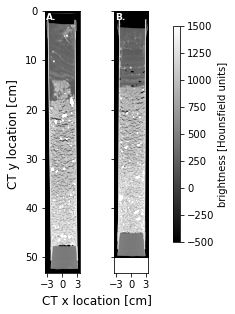

In [25]:
###### PLOT FIGURE S1 - A middle trace of cores 01UW-A and 01UW-C

#### load and reshape the CT scan of 01UW-A
# get the list of files for the core
files = glob('../data/cores/01UW-A/IM*')

# skip files with no SliceLocation information (should be a float)
slices = []
skipcount = 0
for f in files:
    ds = dcmread(f)
    if isinstance(ds.SliceLocation,float):
        slices.append(ds)
    else:
        skipcount = skipcount + 1
        
# re-sort to put the slices in the right order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel dimensions, assuming all slices are the same
ps_a = slices[0].PixelSpacing
ss_a = slices[0].SliceThickness

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d
    
# Subset to get rid of most of the background -- indices determined by hand
core_a = np.copy(img3d[55:1570,720:921,:])

# get the shape of the images and make vectors for x (columns), y (rows), and z (slices).
shp_a = core_a.shape
yvals_a = np.arange(0,shp_a[0])*ps_a[0]
xvals_a = np.arange(0,shp_a[1])*ps_a[1]-np.mean(np.arange(0,shp_a[1])*ps_a[1])
zvals_a = np.arange(0,shp_a[2])*ss_a-np.mean(np.arange(0,shp_a[2])*ss_a)

# only use incides from slices at -27 mm to 29 mm
slice_val = -13 # in mm
iz_a = np.where(zvals_a==slice_val)[0]
######

#### load and reshape the CT scan of 01UW-C
# get the list of files for 01UW-C
files = glob('../data/cores/01UW-C/IM*')

# skip files with no SliceLocation information (should be a float)
slices = []
skipcount = 0
for f in files:
    ds = dcmread(f)
    if isinstance(ds.SliceLocation,float):
        slices.append(ds)
    else:
        skipcount = skipcount + 1

# re-sort to put the slices in the right order
slices = sorted(slices, key=lambda s: s.SliceLocation)

# pixel dimensions, assuming all slices are the same
ps_c = slices[0].PixelSpacing
ss_c = slices[0].SliceThickness

# create 3D array
img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
img3d = np.zeros(img_shape)

# fill 3D array with the images from the files
for i, s in enumerate(slices):
    img2d = s.pixel_array
    img3d[:, :, i] = img2d
    
# Subset to get rid of most of the background -- indices determined by hand
core_c = np.copy(img3d[70:1500,670:871,:])

# get the shape of the images and make vectors for x (columns), y (rows), and z (slices).
shp_c = core_c.shape
yvals_c = np.arange(0,shp_c[0])*ps_c[0]
xvals_c = np.arange(0,shp_c[1])*ps_c[1]-np.mean(np.arange(0,shp_c[1])*ps_c[1])
zvals_c = np.arange(0,shp_c[2])*ss_c-np.mean(np.arange(0,shp_c[2])*ss_c)

slice_val = -15 # in mm
iz_c = np.where(zvals_c==slice_val)[0]
#######

# make the figure! 
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(2,4), facecolor='white', constrained_layout=True)

im1 = ax1.imshow(core_a[:,:,iz_a], cmap = 'gray', 
                 extent=[min(xvals_a)/10, max(xvals_a)/10, max(yvals_a)/10, min(yvals_a)/10])
im1.set_clim(-500,1500)
ax1.set_xticks([-3,0,3])

im2 = ax2.imshow(core_c[:,:,iz_c], cmap = 'gray', 
                 extent=[min(xvals_c)/10, max(xvals_c)/10, max(yvals_c)/10, min(yvals_c)/10])
im2.set_clim(-500,1500)
ax2.set_xticks([-3,0,3])
ax2.set_ylim([max(yvals_a)/10, min(yvals_a)/10])
ax2.set_yticklabels([])

ax1.annotate(xy=(0.03,0.995),text = 'A.', xycoords = 'axes fraction', 
             va = 'top', fontsize = 9, fontweight = 'bold', color='white')
ax2.annotate(xy=(0.03,0.995),text = 'B.', xycoords = 'axes fraction', 
             va = 'top', fontsize = 9, fontweight = 'bold', color='white')

cbar_ax = fig.add_axes([1.05, 0.175, 0.05, 0.75])
fig.colorbar(im2, cax=cbar_ax, label = 'brightness [Hounsfield units]')

fig.supxlabel('CT x location [cm]',x=.52, y=-0.05)
fig.supylabel('CT y location [cm]',x=-0.1, y=.55)

plt.savefig('siegvent2023-figS1.png', 
            bbox_inches='tight', transparent = False, dpi = 300)
plt.show()